**Materi ini dibuat oleh :** [Sardi Irfansyah](https://www.linkedin.com/in/sirfansyah/)

# Instalasi

Sebelum memulai penggunakan Google Gemini, kita harus menginstalasi python package terlebih dahulu.

Menggunakan `Python 3.9+` , instal google-genai paket menggunakan perintah pip berikut:

In [ ]:
!pip install -q -U "google-genai>=1.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.2 MB/s eta 0:00:00


Gunakan metode `generateContent` untuk mengirim permintaan ke API Gemini.

In [20]:
from google.colab import userdata
API_KEY = userdata.get('GEMINI')

In [21]:
from google import genai

# masukan API key kalian
client = genai.Client(api_key=API_KEY)

MODEL_ID= 'gemini-2.5-flash'
response= client.models.generate_content(
  model=MODEL_ID,
  contents=[
    'Explain how AI works.',
  ]
)

print(response.text)

At its core, **Artificial Intelligence (AI)** works by enabling computers to perform tasks that typically require human intelligence. This isn't about giving computers consciousness or sentience, but rather equipping them with the ability to *learn from data, identify patterns, make decisions, and solve problems* in a way that mimics human cognitive functions.

Here's a breakdown of the fundamental principles:

---

### The Core Ingredients of AI:

1.  **Data:**
    *   **The Fuel:** AI models learn from vast amounts of data, much like humans learn from experience. This data can be anything: text, images, sounds, numbers, videos, sensor readings, etc.
    *   **Quality & Quantity:** The more relevant and high-quality data an AI system has access to, the better it can learn and perform. Poor data leads to poor AI.
    *   **Types:** Data can be "labeled" (e.g., pictures tagged "cat" or "dog") for supervised learning, or "unlabeled" for unsupervised learning.

2.  **Algorithms:**
    *  

Agar tampilannya lebih rapi, kalian dapat menggunakan fungsi `Markdown`

In [26]:
from IPython.display import Markdown

Markdown(response.text)

Here is the extracted text from the image:

**Salon Larana**
**DAFTAR HARGA**

**Hair Treatment**
Potong ......... Rp. 15.000
Potong Cuci Tonik ......... Rp. 20.000
Potong Cuci Blow ......... Rp. 20.000
Cuci Catok ......... Rp. 25.000
Cuci Blow ......... Rp. 25.000
Cuci Curly ......... Rp. 25.000
Smoothing ......... Rp. 150.000
Toning ......... Rp. 150.000

**Hair Colouring**
Pendek ......... Rp. 100.000
Medium ......... Rp. 120.000
Panjang ......... Rp. 200.000
Highlight ......... Rp. 250.000
Ombre ......... Rp. 200.000

**Hair Spa / Mask**
Pendek ......... Rp. 70.000
Medium ......... Rp. 100.000
Panjang ......... Rp. 150.000
Creambath ......... Rp. 200.000

Untuk mengecek list model yang ada pada Gemini, kita bisa menggunakan perintah berikut

In [19]:
#cek list model dari gemini
for m in client.models.list():
  print(m.name)

models/embedding-gecko-001
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/ge

Secara default, model mengembalikan respons setelah menyelesaikan seluruh proses pembuatan teks. Anda dapat memperoleh interaksi yang lebih cepat dengan tidak menunggu seluruh hasil, dan sebagai gantinya menggunakan streaming untuk menangani hasil parsial.

```python
from google import genai

client = genai.Client()
response = client.models.generate_content_stream(
    model="gemini-2.0-flash", contents="Write a story about a magic backpack."
)
for chunk in response:
    print(chunk.text)
    print("_" * 80)
```

In [22]:
response = client.models.generate_content_stream(
    model="gemini-2.5-flash", contents="Write a story about a magic backpack."
)
for chunk in response:
    print(chunk.text)
    print("_" * 80)

Leo was not a particularly organized person. His room was a perpetual disaster zone, his school locker a black hole of crumpled papers, and his current backpack, a faded blue canvas affair, seemed to actively conspire against him. It had a habit
________________________________________________________________________________
 of swallowing pencils, devouring homework, and generally making his life more complicated.

One particularly frantic Tuesday morning, searching for his history textbook, Leo plunged his hand into the depths of the backpack. His fingers brushed against something hard and metallic
________________________________________________________________________________
 – not the textbook. He pulled out a small, ornate silver key, intricate carvings swirling on its handle. He'd never seen it before. Shrugging, he tossed it onto his desk, found the textbook (wedged awkwardly behind
________________________________________________________________________________
 his lunchbox)

# Generate text from text-and-image input

Kita akan menggunkan PIL untuk membaca gambar kemudian menambahkan prompt untuk menghasilkan text.

In [23]:
!curl -o salon_price_list.jpg https://marketplace.canva.com/EAFhLHB9S8g/1/0/900w/canva-pink-putih-minimalist-salon-price-list-28N6AZMRZKI.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127k  100  127k    0     0   907k      0 --:--:-- --:--:-- --:--:--  911k


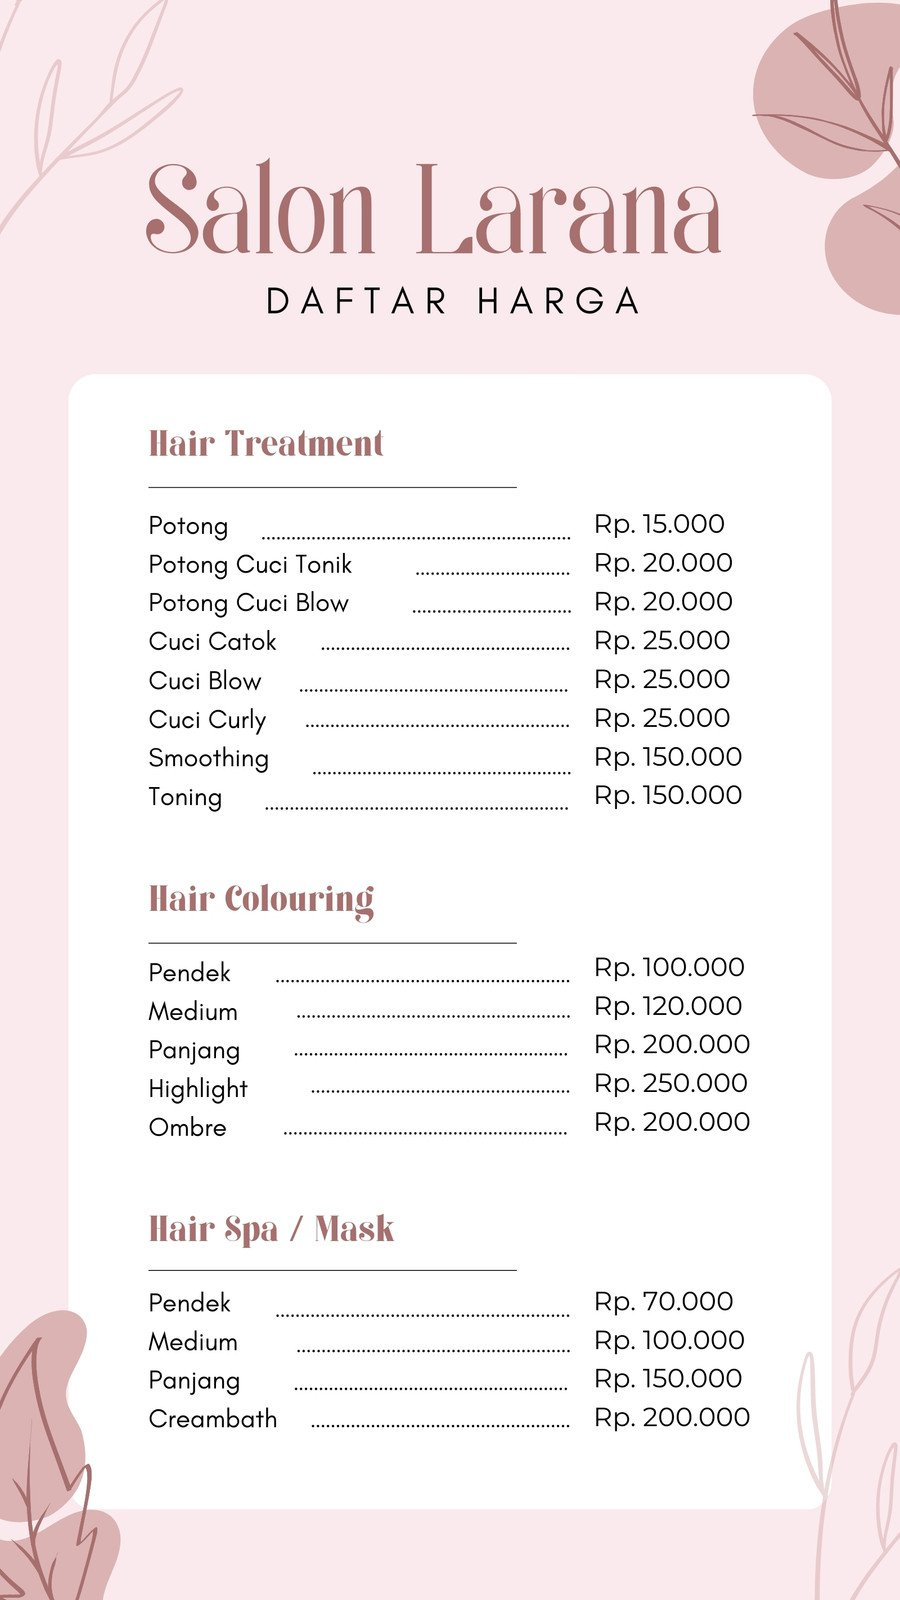

In [30]:
img

In [27]:
import PIL


img = PIL.Image.open("salon_price_list.jpg")
prompt= '' # tanpa prompt
model_id='gemini-2.5-flash'
response = client.models.generate_content(
    model=model_id,
    contents=[img, prompt]
)

Markdown(response.text)

Here is the text extracted from the image:

**Salon Larana**
**DAFTAR HARGA**

---

**Hair Treatment**

*   Potong: Rp. 15.000
*   Potong Cuci Tonik: Rp. 20.000
*   Potong Cuci Blow: Rp. 20.000
*   Cuci Catok: Rp. 25.000
*   Cuci Blow: Rp. 25.000
*   Cuci Curly: Rp. 25.000
*   Smoothing: Rp. 150.000
*   Toning: Rp. 150.000

---

**Hair Colouring**

*   Pendek: Rp. 100.000
*   Medium: Rp. 120.000
*   Panjang: Rp. 200.000
*   Highlight: Rp. 250.000
*   Ombre: Rp. 200.000

---

**Hair Spa / Mask**

*   Pendek: Rp. 70.000
*   Medium: Rp. 100.000
*   Panjang: Rp. 150.000
*   Creambath: Rp. 200.000

In [28]:
prompt= 'buatlah table dari response tersebut' # dengan prompt
response = client.models.generate_content(
  model=model_id,
  contents=[img, prompt]
)

Markdown(response.text)

Tentu, berikut adalah tabel dari daftar harga "Salon Larana" berdasarkan gambar yang Anda berikan:

## Daftar Harga Salon Larana

| Kategori             | Layanan           | Harga           |
| :------------------- | :---------------- | :-------------- |
| **Hair Treatment**   | Potong            | Rp. 15.000      |
|                      | Potong Cuci Tonik | Rp. 20.000      |
|                      | Potong Cuci Blow  | Rp. 20.000      |
|                      | Cuci Catok        | Rp. 25.000      |
|                      | Cuci Blow         | Rp. 25.000      |
|                      | Cuci Curly        | Rp. 25.000      |
|                      | Smoothing         | Rp. 150.000     |
|                      | Toning            | Rp. 150.000     |
| **Hair Colouring**   | Pendek            | Rp. 100.000     |
|                      | Medium            | Rp. 120.000     |
|                      | Panjang           | Rp. 200.000     |
|                      | Highlight         | Rp. 250.000     |
|                      | Ombre             | Rp. 200.000     |
| **Hair Spa / Mask**  | Pendek            | Rp. 70.000      |
|                      | Medium            | Rp. 100.000     |
|                      | Panjang           | Rp. 150.000     |
|                      | Creambath         | Rp. 200.000     |

In [29]:
prompt= '''buatlah tabel dari response tersebut,
buatlah code python untuk membuat dataframe dari tabel tersebut'''
response = client.models.generate_content(
  model=model_id,
  contents=[img, prompt]
)

Markdown(response.text)

Tentu, berikut adalah tabel dari informasi yang Anda berikan, diikuti dengan kode Python untuk membuat DataFrame dari tabel tersebut.

---

### Tabel Daftar Harga Salon Larana

| Kategori Layanan  | Nama Layanan      | Harga        |
| :---------------- | :---------------- | :----------- |
| Hair Treatment    | Potong            | Rp. 15.000   |
| Hair Treatment    | Potong Cuci Tonik | Rp. 20.000   |
| Hair Treatment    | Potong Cuci Blow  | Rp. 20.000   |
| Hair Treatment    | Cuci Catok        | Rp. 25.000   |
| Hair Treatment    | Cuci Blow         | Rp. 25.000   |
| Hair Treatment    | Cuci Curly        | Rp. 25.000   |
| Hair Treatment    | Smoothing         | Rp. 150.000  |
| Hair Treatment    | Toning            | Rp. 150.000  |
| Hair Colouring    | Pendek            | Rp. 100.000  |
| Hair Colouring    | Medium            | Rp. 120.000  |
| Hair Colouring    | Panjang           | Rp. 200.000  |
| Hair Colouring    | Highlight         | Rp. 250.000  |
| Hair Colouring    | Ombre             | Rp. 200.000  |
| Hair Spa / Mask   | Pendek            | Rp. 70.000   |
| Hair Spa / Mask   | Medium            | Rp. 100.000  |
| Hair Spa / Mask   | Panjang           | Rp. 150.000  |
| Hair Spa / Mask   | Creambath         | Rp. 200.000  |

---

### Kode Python untuk Membuat DataFrame

```python
import pandas as pd

# Data yang diambil dari tabel
data = [
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Potong", "Harga": "Rp. 15.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Potong Cuci Tonik", "Harga": "Rp. 20.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Potong Cuci Blow", "Harga": "Rp. 20.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Cuci Catok", "Harga": "Rp. 25.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Cuci Blow", "Harga": "Rp. 25.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Cuci Curly", "Harga": "Rp. 25.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Smoothing", "Harga": "Rp. 150.000"},
    {"Kategori Layanan": "Hair Treatment", "Nama Layanan": "Toning", "Harga": "Rp. 150.000"},
    {"Kategori Layanan": "Hair Colouring", "Nama Layanan": "Pendek", "Harga": "Rp. 100.000"},
    {"Kategori Layanan": "Hair Colouring", "Nama Layanan": "Medium", "Harga": "Rp. 120.000"},
    {"Kategori Layanan": "Hair Colouring", "Nama Layanan": "Panjang", "Harga": "Rp. 200.000"},
    {"Kategori Layanan": "Hair Colouring", "Nama Layanan": "Highlight", "Harga": "Rp. 250.000"},
    {"Kategori Layanan": "Hair Colouring", "Nama Layanan": "Ombre", "Harga": "Rp. 200.000"},
    {"Kategori Layanan": "Hair Spa / Mask", "Nama Layanan": "Pendek", "Harga": "Rp. 70.000"},
    {"Kategori Layanan": "Hair Spa / Mask", "Nama Layanan": "Medium", "Harga": "Rp. 100.000"},
    {"Kategori Layanan": "Hair Spa / Mask", "Nama Layanan": "Panjang", "Harga": "Rp. 150.000"},
    {"Kategori Layanan": "Hair Spa / Mask", "Nama Layanan": "Creambath", "Harga": "Rp. 200.000"}
]

# Membuat DataFrame
df = pd.DataFrame(data)

# Opsional: Mengkonversi kolom 'Harga' menjadi tipe numerik (integer)
# Ini berguna jika Anda ingin melakukan perhitungan matematis pada harga.
# Pertama, hapus 'Rp. ' dan tanda titik (.), lalu konversi ke integer.
df['Harga (Numeric)'] = df['Harga'].str.replace('Rp. ', '', regex=False).str.replace('.', '', regex=False).astype(int)

# Menampilkan DataFrame
print(df)
```

**Penjelasan Kode:**

1.  **`import pandas as pd`**: Mengimpor library pandas yang digunakan untuk bekerja dengan DataFrame.
2.  **`data = [...]`**: Membuat list of dictionaries. Setiap dictionary merepresentasikan satu baris dalam DataFrame, dengan keys (kunci) sebagai nama kolom (`"Kategori Layanan"`, `"Nama Layanan"`, `"Harga"`) dan values (nilai) sebagai data untuk baris tersebut.
3.  **`df = pd.DataFrame(data)`**: Membuat DataFrame pandas dari list of dictionaries yang telah didefinisikan.
4.  **`df['Harga (Numeric)'] = ...` (Opsional)**: Baris ini melakukan konversi pada kolom 'Harga'.
    *   `.str.replace('Rp. ', '', regex=False)`: Menghilangkan teks "Rp. " dari string.
    *   `.str.replace('.', '', regex=False)`: Menghilangkan tanda titik (pemisah ribuan) dari string.
    *   `.astype(int)`: Mengkonversi string yang sudah bersih menjadi tipe data integer. Kolom baru bernama 'Harga (Numeric)' ditambahkan ke DataFrame.
5.  **`print(df)`**: Mencetak DataFrame ke konsol.

Output dari kode Python di atas akan menampilkan tabel yang terstruktur seperti ini:

```
    Kategori Layanan Nama Layanan      Harga  Harga (Numeric)
0     Hair Treatment       Potong  Rp. 15.000            15000
1     Hair Treatment  Potong Cuci Tonik  Rp. 20.000            20000
2     Hair Treatment   Potong Cuci Blow  Rp. 20.000            20000
3     Hair Treatment         Cuci Catok  Rp. 25.000            25000
4     Hair Treatment          Cuci Blow  Rp. 25.000            25000
5     Hair Treatment         Cuci Curly  Rp. 25.000            25000
6     Hair Treatment          Smoothing  Rp. 150.000          150000
7     Hair Treatment             Toning  Rp. 150.000          150000
8     Hair Colouring             Pendek  Rp. 100.000          100000
9     Hair Colouring             Medium  Rp. 120.000          120000
10    Hair Colouring            Panjang  Rp. 200.000          200000
11    Hair Colouring          Highlight  Rp. 250.000          250000
12    Hair Colouring              Ombre  Rp. 200.000          200000
13   Hair Spa / Mask             Pendek  Rp. 70.000            70000
14   Hair Spa / Mask             Medium  Rp. 100.000          100000
15   Hair Spa / Mask            Panjang  Rp. 150.000          150000
16   Hair Spa / Mask          Creambath  Rp. 200.000          200000
```

Untuk mempelajari lebih detail berkaitan dengan pengolahan Image dengan Gemini, Anda dapat melihat pada referensi berikut:
- [Explore vision capabilities with the Gemini API](https://ai.google.dev/gemini-api/docs/vision?lang=python)

# Document Understanding

Google Gemini juga dapat kita gunakan untuk mengelolah file atau dokumen dalam berbagai macam format, misalkan format pdf.

Untuk mempelajari lebih detail berkaitan dengan pengolahan Dokumen dengan Gemini, Anda dapat melihat pada referensi berikut:
- [Explore document processing capabilities with the Gemini API](https://ai.google.dev/gemini-api/docs/document-processing?hl=id&lang=python)

In [31]:
from google.genai import types
import httpx
import base64

doc_url = "https://discovery.ucl.ac.uk/id/eprint/10089234/1/343019_3_art_0_py4t4l_convrt.pdf"  # Replace with the actual URL of your PDF

# Retrieve and encode the PDF
doc_data = httpx.get(doc_url).content

prompt = "Summarize this document"
response = client.models.generate_content(
  model="gemini-2.5-flash",
  contents=[
      types.Part.from_bytes(
        data=doc_data,
        mime_type='application/pdf',
      ),
      prompt])
print(response.text)


This paper introduces **AlphaFold**, a novel deep learning-based system for protein structure prediction, addressing the fundamental problem of determining a protein's three-dimensional shape from its amino acid sequence.

**Key Innovations and Methodology:**

*   **Distance Prediction:** Unlike previous methods that often rely on binary contact predictions, AlphaFold trains a deep convolutional neural network to directly predict precise *distance distributions* between pairs of amino acid residues (a "distogram"). This provides significantly richer structural information.
*   **Potential of Mean Force:** These predicted distance distributions, combined with predicted torsion angles and a van der Waals term, are used to construct a differentiable, protein-specific "potential of mean force."
*   **Simple Gradient Descent Optimization:** A major departure from traditional approaches (like fragment assembly with stochastic sampling), this potential can be efficiently minimized using simpl

# Audio Understanding

Google Gemini juga dapat kita gunakan untuk mengelolah Audio dalam berbagai macam format, misalkan format MP3,WAV dan format lainnya. Berikut adalah contoh codenya:

```python
your_audio_file = client.files.upload(file='sample.mp3')
response = client.models.generate_content(
  model=MODEL_ID,
  contents=[
    'Describe this audio clip.',
    your_audio_file,
  ]
)

print(response.text)
```

Untuk mempelajari lebih detail berkaitan dengan pengolahan Audio dengan Gemini, Anda dapat melihat pada referensi berikut:
- [Explore audio capabilities with the Gemini API](https://ai.google.dev/gemini-api/docs/audio?lang=python)

In [32]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"
!wget -q $URL -O sample.mp3

In [33]:
your_audio_file= client.files.upload(file='sample.mp3')
your_audio_file

File(
  create_time=datetime.datetime(2025, 8, 20, 14, 38, 41, 846967, tzinfo=TzInfo(UTC)),
  expiration_time=datetime.datetime(2025, 8, 22, 14, 38, 41, 668122, tzinfo=TzInfo(UTC)),
  mime_type='audio/mpeg',
  name='files/jxorgvwyddco',
  sha256_hash='MGU3ZmFmZTE5ODRhZWQyNGMxNWJlMDc4OWEzNWU2MGM1YWYwYzczNzNiOWVkOWYyNjMxMzE2NzQwYTRiOWVlNg==',
  size_bytes=41762063,
  source=<FileSource.UPLOADED: 'UPLOADED'>,
  state=<FileState.ACTIVE: 'ACTIVE'>,
  update_time=datetime.datetime(2025, 8, 20, 14, 38, 41, 846967, tzinfo=TzInfo(UTC)),
  uri='https://generativelanguage.googleapis.com/v1beta/files/jxorgvwyddco'
)

In [ ]:
response = client.models.generate_content(
  model=model_id,
  contents=[
    'Listen carefully to the following audio file. Provide a brief summary.',
    your_audio_file,
  ]
)

print(response.text)

In his first State of the Union Address on January 30, 1961, President John F. Kennedy acknowledged the privilege of addressing Congress and the inspiration he drew from its history.

He opened by outlining the severe challenges facing the nation, both domestically and internationally. He detailed a disturbing economic situation, characterized by recession, high unemployment, stagnant growth, and declining farm income, proposing immediate legislative measures to stimulate recovery, including expanded unemployment benefits, housing and construction boosts, and an increased minimum wage.

Internationally, Kennedy addressed a widening balance of payments deficit and gold outflow, firmly committing to maintain the dollar's value and strengthen the nation's financial position through various economic and trade initiatives, including a new "Alliance for Progress" for Latin America. He also highlighted pressing social issues like inadequate housing, overcrowded schools, and inaccessible healt

# Chat Conversation

Gemini SDK memungkinkan Anda mengumpulkan beberapa putaran pertanyaan dan respons, yang memungkinkan pengguna untuk melangkah secara bertahap menuju jawaban atau mendapatkan bantuan untuk masalah yang terdiri dari beberapa bagian. Fitur SDK ini menyediakan antarmuka untuk melacak **riwayat percakapan**, tetapi di balik layar menggunakan metode `generateContent`.

In [ ]:
chat = client.chats.create(model="gemini-2.5-flash")

response = chat.send_message("Dalam satu kalimat, jelaskan cara kerja komputer kepada anak kecil.")
Markdown(response.text)

Komputer itu seperti otak pintar yang sangat cepat; ia menerima apa yang kamu suruh (misalnya, klik atau ketik), memikirkannya, lalu menunjukkan hasilnya padamu di layar.

In [ ]:
response = chat.send_message("Jelaskan cara membuat otomatisasi email")
Markdown(response.text)

Otomatisasi email adalah proses pengiriman email yang telah dipersiapkan sebelumnya (seperti email selamat datang, notifikasi pembelian, atau pengingat keranjang belanja) secara otomatis kepada daftar penerima berdasarkan pemicu (trigger) atau kondisi tertentu yang telah diatur.

Berikut adalah langkah-langkah dan cara kerjanya:

1.  **Pilih Platform Otomatisasi Email:** Anda memerlukan alat atau software khusus. Contoh populer termasuk Mailchimp, Sendinblue (Brevo), ActiveCampaign, HubSpot, Klaviyo, atau ConvertKit. Platform ini menyediakan fitur untuk membuat, mengatur, dan mengirim email secara otomatis.

2.  **Tentukan Tujuan & Pemicu (Trigger):**
    *   **Tujuan:** Apa yang ingin Anda capai? (Misal: menyambut pelanggan baru, mengingatkan pembelian yang belum selesai, memberikan diskon spesial pada ulang tahun pelanggan, atau mengirim kursus email bertahap).
    *   **Pemicu:** Apa yang akan "memulai" proses otomatisasi ini?
        *   **Contoh Pemicu:**
            *   **Pendaftaran (Sign-up):** Seseorang mengisi formulir di website Anda.
            *   **Pembelian:** Seseorang melakukan transaksi.
            *   **Keranjang Belanja Ditinggalkan (Abandoned Cart):** Seseorang menambahkan produk ke keranjang tapi tidak menyelesaikan pembelian.
            *   **Tanggal Spesifik:** Ulang tahun atau hari jadi pelanggan.
            *   **Interaksi:** Membuka email tertentu, mengklik tautan, atau tidak aktif selama periode tertentu.

3.  **Segmentasi Audiens:** Kelompokkan audiens Anda berdasarkan minat, perilaku, demografi, atau riwayat pembelian. Otomatisasi akan jauh lebih efektif jika email yang dikirim relevan dengan segmen audiens tertentu.

4.  **Buat Konten Email:** Tulis email yang ingin Anda kirim. Ini bisa berupa satu email atau serangkaian email (disebut "workflow" atau "sequence"). Pastikan kontennya menarik, relevan dengan pemicunya, dan memiliki panggilan untuk bertindak (Call-to-Action/CTA) yang jelas.

5.  **Bangun Alur Otomatisasi (Workflow):**
    *   Di platform yang Anda pilih, Anda akan menggunakan builder visual (seringkali drag-and-drop) untuk mengatur alur.
    *   **Mulai dengan Pemicu:** Tentukan pemicu yang Anda pilih (misal: "Saat kontak baru berlangganan").
    *   **Tambahkan Aksi:** Setelah pemicu, apa yang harus dilakukan? (Misal: "Kirim Email 1").
    *   **Atur Penundaan (Delays):** Anda bisa mengatur jeda waktu antara email atau aksi (misal: "Tunggu 2 hari, lalu Kirim Email 2").
    *   **Kondisi (Conditional Splits):** Beberapa platform memungkinkan Anda menambahkan kondisi "JIKA/MAKA". Contoh: "JIKA pengguna membuka Email 1, MAKA kirim Email A; JIKA tidak membuka, MAKA kirim Email B."
    *   **Aksi Lain:** Anda juga bisa menambahkan aksi internal seperti "Menambahkan tag ke kontak," "Memindahkan kontak ke daftar lain," atau "Mengirim notifikasi ke tim penjualan."

6.  **Uji Coba (Testing):** Sebelum mengaktifkan alur, kirim email uji coba ke diri sendiri atau rekan kerja. Periksa apakah semua tautan berfungsi, personalisasi tampil benar, dan email terlihat baik di berbagai perangkat.

7.  **Aktifkan & Pantau:** Setelah yakin semuanya benar, aktifkan alur otomatisasi Anda. Pantau metrik seperti tingkat buka (open rate), rasio klik-tayang (click-through rate), dan konversi untuk melihat seberapa efektif otomatisasi Anda. Lakukan penyesuaian berdasarkan data untuk terus mengoptimalkannya.

**Singkatnya, otomatisasi email memungkinkan Anda mengirim pesan yang tepat kepada orang yang tepat, pada waktu yang tepat, tanpa harus melakukannya secara manual berulang kali, sehingga menghemat waktu dan meningkatkan efisiensi komunikasi Anda.**

Kita dapat mengecek history atau riwayat chat dengan perintah berikut.

In [ ]:
for message in chat.get_history():
    print(f'role - {message.role}',end=": ")
    print(message.parts[0].text)

role - user: Dalam satu kalimat, jelaskan cara kerja komputer kepada anak kecil.
role - model: Komputer itu seperti otak pintar yang sangat cepat; ia menerima apa yang kamu suruh (misalnya, klik atau ketik), memikirkannya, lalu menunjukkan hasilnya padamu di layar.
role - user: Jelaskan cara membuat otomatisasi email
role - model: Membuat otomatisasi email melibatkan penggunaan platform pemasaran email untuk mengirim serangkaian email yang telah ditentukan sebelumnya kepada segmen audiens tertentu berdasarkan pemicu (trigger) dan kondisi yang telah ditetapkan.

Berikut adalah langkah-langkah dan konsep dasarnya:

**Konsep Utama Otomatisasi Email:**

1.  **Pemicu (Trigger):** Ini adalah tindakan atau peristiwa yang memulai alur otomatisasi email. Contoh:
    *   Seseorang mendaftar ke newsletter Anda.
    *   Seseorang melakukan pembelian.
    *   Seseorang meninggalkan keranjang belanja (abandoned cart).
    *   Seseorang mengunjungi halaman tertentu di situs web Anda.
    *   Tanggal 

# Generate Images

Pastikan Anda menggunakan model dan versi yang didukung untuk pembuatan gambar:

- Untuk **Gemini**, gunakan Pembuatan Gambar Pratinjau Flash Gemini 2.0.
- Untuk **Imagen**, gunakan Imagen 3. Perhatikan bahwa model ini hanya tersedia di Paket berbayar.



Lebih detailnya Anda dapat lihat pada referensi berikut:
[Generate Images](https://ai.google.dev/gemini-api/docs/image-generation?hl=id)

I will generate a 3D rendered image depicting a whimsical scene. A cat with fluffy fur, large expressive eyes, and a stylish grey top hat will be soaring through the air on a pair of delicate, feathered wings. Below, a vibrant, futuristic city will stretch out, characterized by sleek, modern buildings interspersed with abundant green spaces, lush vegetation climbing the sides of structures, and happy-looking flying vehicles zipping between them under a bright sky.



image/png


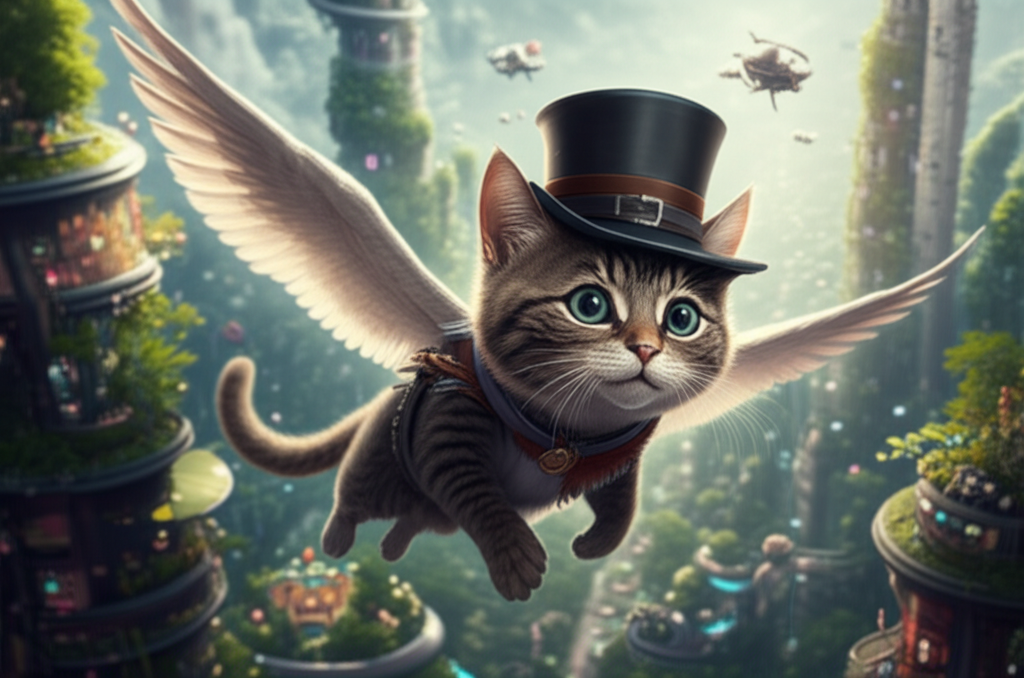

In [ ]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can create a 3d rendered image of a cat with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

# Latihan

Sekarang cobalah lakukan latihan untuk mengelolah gambar ataupun audio dengan data yang anda miliki (data dibebaskan). Serta lakukanlah beberapa macam teknik prompting dasar yang telah anda pelajari.